# Ejercicio de Iteración de Valor

## Instalar los requerimientos

In [21]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Importar dependencias

In [22]:
pip install gym

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import gymnasium as gym
import numpy as np
from plot_utils import plot_values

## Para hacer: Arregla el código para desarrollar tu algoritmo de Iteración de Valor

In [19]:
import gym
import numpy as np

class ValueIteration:
    def __init__(self, env: gym.Env, gamma: float, epsilon: float) -> None:
        """
        Inicializa el algoritmo de iteración de valor.

        Args:
            env (gym.Env): Entorno OpenAI gym.
            gamma (float): Factor de descuento.
            epsilon (float): Umbral de convergencia.
        """
        self.env = env  # Entorno OpenAI gym
        self.gamma = gamma  # Factor de descuento
        # Las recompensas para cada estado se inicializan a 0, excepto para el estado final que tiene una recompensa de 1.
        self.reward = {i: 0.0 for i in range(env.observation_space.n)}
        self.reward[env.observation_space.n - 1] = 1.0
        self.epsilon = epsilon  # Umbral de convergencia
        # La función de valor se inicializa con ceros.
        self.V = np.zeros(env.observation_space.n)  # Función de valor inicial

    def train(self) -> np.ndarray:
        """
        Algoritmo de iteración de valor.

        Retorna:
            policy (np.ndarray): Política óptima.
        """
        while True:
            delta = 0
            # Itera sobre todos los estados del entorno.
            for state in range(self.env.observation_space.n):
                v = self.V[state]
                # Calcula el valor para cada acción en el estado actual.
                action_values = [self.calculate_q(state, action) for action in range(self.env.action_space.n)]
                # Actualiza el valor del estado actual con el máximo valor de las acciones posibles.
                self.V[state] = max(action_values)
                # Calcula el cambio máximo en los valores de la función de valor.
                delta = max(delta, abs(v - self.V[state]))
            # Verifica la convergencia.
            if delta < self.epsilon:
                break
        
        # Calcula la política óptima.
        policy = self.calculate_policy()
        return policy, self.V

    def calculate_q(self, state: int, action: int) -> float:
        """
        Calcula el valor Q para un estado y una acción dados.

        Args:
            state (int): Estado actual.
            action (int): Acción a tomar.

        Returns:
            q_value (float): Valor Q.
        """
        q_value = 0
        # Itera sobre las posibles transiciones desde el estado y acción dados.
        for prob, next_state, reward, _ in self.env.P[state][action]:
            # Aplica la ecuación de Bellman para calcular el valor Q.
            q_value += prob * (self.reward[state] + self.gamma * self.V[next_state])
        return q_value

    def calculate_policy(self) -> np.ndarray:
        """
        Calcula la política óptima basada en la función de valor actual.

        Returns:
            policy (np.ndarray): Política óptima.
        """
        policy = np.zeros(self.env.observation_space.n, dtype=int)
        # Para cada estado, calcula el valor para cada acción y selecciona la acción con el valor más alto como la acción óptima.
        for state in range(self.env.observation_space.n):
            action_values = [self.calculate_q(state, action) for action in range(self.env.action_space.n)]
            policy[state] = np.argmax(action_values)
        return policy

    def play(self, policy: np.ndarray, render: bool = True) -> float:
        """
        Juega utilizando la política dada.

        Args:
            policy (np.ndarray): Política a seguir.
            render (bool): Indica si renderizar o no.

        Returns:
            total_reward (float): Recompensa total obtenida.
        """
        total_reward = 0.0
        state, _ = self.env.reset()
        while True:
            if render:
                self.env.render()
            action = policy[state]
            state, reward, done, _, _ = self.env.step(action)
            total_reward += reward
            # Si el juego termina y la recompensa es diferente de cero, se detiene.
            if done and reward != 0:                
                break
            else:
                # Si el juego termina y la recompensa es cero, se reinicia el entorno.
                if done and reward == 0:
                    observation, info = self.env.reset()
        return total_reward


## Observa a tu agente jugar

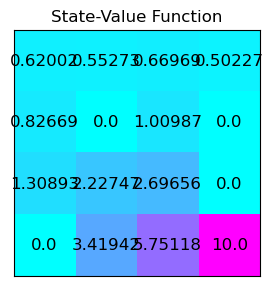

Optimal policy:
[0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]
Total reward: 9.999999999142268


In [20]:
size = 4  # Only 4 and 8 are supported
env = gym.make(
    "FrozenLake-v1",
    desc=None,
    map_name=f"{size}x{size}",
    is_slippery=True,
    render_mode="human",
)
gamma: float = 0.9
pi_error: float = 1e-10

# Run policy iteration
value_iteration = ValueIteration(env, gamma, pi_error)
policy, V = value_iteration.train()

value_iteration.play(policy)
env.close()
plot_values(V, size)
# Mostrar la política óptima
print("Optimal policy:")
print(policy)

# Calcular la recompensa esperada
expected_reward = V[15]
print("Total reward:", expected_reward)

## Verifica que tu solución sea correcta


In [21]:
# Define la política óptima para el entorno FrozenLake
optimal_policy = [0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]

# Crea una instancia del entorno FrozenLake
size = 4
env = gym.make(
    "FrozenLake-v1",
    desc=None,
    map_name=f"{size}x{size}",
    is_slippery=True,
    render_mode="human",
)

# Aplica la política óptima al entorno FrozenLake
env.env.P = np.array(optimal_policy)

# Ejecuta el juego con la política óptima
state = env.reset()[0]  # Reinicia el estado del entorno
done = False  # Inicializa el indicador de finalización del juego
while not done:
    env.render()  # Renderiza el estado actual del entorno
    action = optimal_policy[state]  # Obtiene la acción de la política óptima
    state, _, done, _ = env.step(action)[:4]  # Ejecuta la acción en el entorno y obtiene el próximo estado

# Cierra la ventana de renderizado al finalizar
env.close()


Al aplicar una política óptima predefinida al entorno FrozenLake y ejecutar el juego utilizando esta política, se ha observado el desempeño del agente en el entorno. Esto nos permite evaluar cómo el agente se comporta según la política seleccionada y comprender mejor su rendimiento en el entorno del juego.